连接数据库!
ip解析记录!
当前目录 /Users/zengqingfeng/word/jupyter


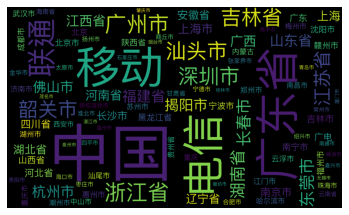

In [97]:
#!/usr/bin/python3
import pymysql
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import os
import re
 
# 去掉停用词
def remove_stop_words(f):
     stop_words = ['0','|']
     for stop_word in stop_words:
           f = f.replace(stop_word, ' ')
     return f
 
# 生成词云
def create_word_cloud(f):
     print('ip解析记录!')
     # 获取运行环境目录位置
     base_dir = os.getcwd()
     # Console 输出目录信息
     print('当前目录 '+base_dir)
     # 在mac上这个字体可以解决乱码问题
     ttf = '/System/Library/fonts/PingFang.ttc' 
     # windows 可以用这个，单独下载SimHei.ttf字体放在同级目录
     #FONT_PATH = os.environ.get("FONT_PATH", os.path.join(base_dir, "SimHei.ttf"))
     FONT_PATH = os.environ.get("FONT_PATH", ttf)
     f = remove_stop_words(f)
     cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
     wc = WordCloud(
           font_path=FONT_PATH,
           collocations=False, # 关键词重复
           max_words=100, # 最大200个词
           width=2000,
           height=1200,
    )
     wordcloud = wc.generate(cut_text)
   
     # 显示词云文件
     plt.imshow(wordcloud)
     plt.axis("off") #隐藏坐标
     #plt.savefig(base_dir+'cloud.png',dpi=500) #dpi通过这里可以放大或缩小
       # 写词云图片
     wordcloud.to_file("wordcloud.jpg")
     plt.show()
    
 
def get_content_from_db():
    print('连接数据库!')
    dbhost='localhost'
    dbuser='root'
    dbpass='123456'
    dbname='ip_info'
     # 创建数据库连接
    db = pymysql.connect(host=dbhost,user=dbuser,password=dbpass,database=dbname)
     # 使用cursor()方法获取操作游标 
    cursor = db.cursor()
     # 创建数据表
     # 查询当前数据库中的所有数据表
    sql = "SELECT * FROM ip_registered "
     # 执行SQL语句
    cursor.execute(sql)
    # 获取所有记录列表
    results = cursor.fetchall()
    content = ''
    for row in results:
        id = row[0]
        registeredIp = row[1]
        createTime = row[2]
        updateTime = row[3]
        registeredAddress = row[4]
        content = content + str(registeredAddress + "\n")
        # 打印结果
#         print ("id=%s,registeredIp=%s,createTime=%d,updateTime=%s",registeredAddress=%s % \
#              (id, registeredIp, createTime, updateTime,registeredAddress ))
     # 提交事务 
    db.commit()
     # 关闭游标
    db.close()
    return content
content = get_content_from_db()
# 去掉可能出现HTML标签里的内容
pattern = re.compile(r'<[^>]+>',re.S)
content = pattern.sub('', content)

# 将记录生成词云
create_word_cloud(content)